In [44]:
# Thêm autoreload vào để tự động reload lại module nếu có thay đổi code trong module
%load_ext autoreload
%autoreload 2

import mediapipe as mp
import pandas as pd
import os, sys
import warnings

# Thêm đường dẫn dẫn đến thư mục cha
sys.path.append(os.path.abspath(".."))
warnings.filterwarnings("ignore")

# Drawing helpers
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

from utils.training_storage_helper import load_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load models

In [45]:
# Load model
RF_model = load_model('../best_models_new/random_forest.pkl')

# Load input scaler
input_scaler = load_model("../best_models_new/input_scaler.pkl")

In [46]:
def get_class(encode_label: float):
    return {
        0: "C",
        1: "W",
        2: "S"
    }.get(encode_label, "Unknown")

### Load data

In [47]:
test_df = pd.read_csv("../../data/data_testing_processed.csv")

In [48]:
test_df.shape

(110, 46)

In [49]:
test_df.head()

,label,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,...,left_knee_z,right_knee_x,right_knee_y,right_knee_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,1_lie_on,0.063806,-0.471173,-0.158296,0.174684,-0.274359,-0.003388,-0.174684,-0.225641,0.014156,...,-0.438663,-0.361396,0.332285,-0.305667,-0.017708,0.778210,-0.177415,-0.233714,0.703816,-0.004737
1,1_lie_on,0.207801,-0.376846,-0.215723,0.158269,-0.226048,0.013159,-0.158269,-0.273952,-0.032962,...,-0.506914,-0.329743,0.392618,-0.535619,0.394993,0.852382,-0.307368,-0.278916,0.901451,-0.355209
2,1_lie_on,-0.173413,-0.465733,-0.181111,0.204568,-0.242831,-0.086275,-0.204568,-0.257169,0.027563,...,-0.335849,-0.398254,0.177471,-0.368805,0.417489,0.611109,-0.695085,-0.474026,0.452334,-0.723974
3,1_lie_on,0.021212,-0.469013,-0.144825,0.172144,-0.250030,0.010775,-0.172144,-0.249970,0.027969,...,-0.321528,-0.396634,0.269852,-0.241657,0.193756,0.799008,-0.154491,-0.239965,0.638738,-0.144774
4,1_lie_on,-0.150495,-0.408067,-0.291727,0.179470,-0.257729,-0.072306,-0.179470,-0.242271,-0.010339,...,-0.503918,-0.284997,0.453212,-0.513836,0.193154,0.816380,-0.085839,-0.207607,0.793971,-0.039509


In [50]:
X_test = test_df.drop(columns=["label"])
y_test = test_df["label"]

### Chuẩn hoá dữ liệu

In [51]:
X_test = input_scaler.transform(X_test)

In [52]:
X_test

array([[ 0.73760819, -1.27399882,  0.15852331, ..., -0.74098364,
         0.22034829, -0.26515162],
       [ 2.24317246,  1.17881432, -0.09092639, ..., -0.89020043,
         1.23292592, -1.03610346],
       [-1.74267273, -1.13254587,  0.0594179 , ..., -1.53427848,
        -1.06811518, -1.84729466],
       ...,
       [-0.78128181,  0.04672366, -0.14859429, ...,  0.7118877 ,
        -0.66098315,  0.76283392],
       [ 0.88570338, -1.35875204,  0.32984423, ...,  0.49305123,
        -1.50351188,  1.27613381],
       [-1.36143235,  0.11875388,  0.42927657, ..., -0.19702077,
        -0.43565519,  1.25413564]])

In [53]:
# Chuyển dữ liệu của label về dạng số
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

### Testing

In [54]:
y_pred = RF_model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


In [55]:
accuracy

0.8909090909090909

In [56]:
test_df

,label,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,...,left_knee_z,right_knee_x,right_knee_y,right_knee_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,1_lie_on,0.063806,-0.471173,-0.158296,0.174684,-0.274359,-0.003388,-0.174684,-0.225641,0.014156,...,-0.438663,-0.361396,0.332285,-0.305667,-0.017708,0.778210,-0.177415,-0.233714,0.703816,-0.004737
1,1_lie_on,0.207801,-0.376846,-0.215723,0.158269,-0.226048,0.013159,-0.158269,-0.273952,-0.032962,...,-0.506914,-0.329743,0.392618,-0.535619,0.394993,0.852382,-0.307368,-0.278916,0.901451,-0.355209
2,1_lie_on,-0.173413,-0.465733,-0.181111,0.204568,-0.242831,-0.086275,-0.204568,-0.257169,0.027563,...,-0.335849,-0.398254,0.177471,-0.368805,0.417489,0.611109,-0.695085,-0.474026,0.452334,-0.723974
3,1_lie_on,0.021212,-0.469013,-0.144825,0.172144,-0.250030,0.010775,-0.172144,-0.249970,0.027969,...,-0.321528,-0.396634,0.269852,-0.241657,0.193756,0.799008,-0.154491,-0.239965,0.638738,-0.144774
4,1_lie_on,-0.150495,-0.408067,-0.291727,0.179470,-0.257729,-0.072306,-0.179470,-0.242271,-0.010339,...,-0.503918,-0.284997,0.453212,-0.513836,0.193154,0.816380,-0.085839,-0.207607,0.793971,-0.039509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,3_procumbent,-0.079127,-0.459529,0.116844,-0.193436,-0.242476,-0.223831,0.193436,-0.257524,-0.062362,...,0.300795,0.199415,0.262285,0.377554,-0.257956,0.631257,0.477938,0.187330,0.651443,0.607318
106,3_procumbent,-0.073267,-0.489312,-0.091480,-0.164660,-0.277701,-0.307550,0.164660,-0.222299,-0.171105,...,0.280884,-0.005144,0.369569,0.410642,-0.356005,0.654863,0.642089,-0.048885,0.614314,0.811664
107,3_procumbent,-0.081463,-0.420382,-0.229000,0.133203,-0.261845,-0.023318,-0.133203,-0.238155,-0.109052,...,0.302716,0.084677,0.324975,0.029018,0.260853,0.546993,0.500227,0.206405,0.531798,0.462581
108,3_procumbent,0.077970,-0.474432,-0.118854,-0.185265,-0.232456,-0.139984,0.185265,-0.267544,-0.207570,...,0.429341,0.348139,0.178880,0.241599,-0.089547,0.343349,0.776774,0.140112,0.367353,0.695925


In [57]:
test_df.insert(0, "predicted_label", label_encoder.inverse_transform(y_pred))

In [58]:
test_df.to_csv("test.csv", index=False)

In [59]:
cf = confusion_matrix(y_test, y_pred)

In [60]:
cf

array([[41,  1,  0],
       [ 3, 35,  2],
       [ 3,  3, 22]], dtype=int64)

<Axes: >

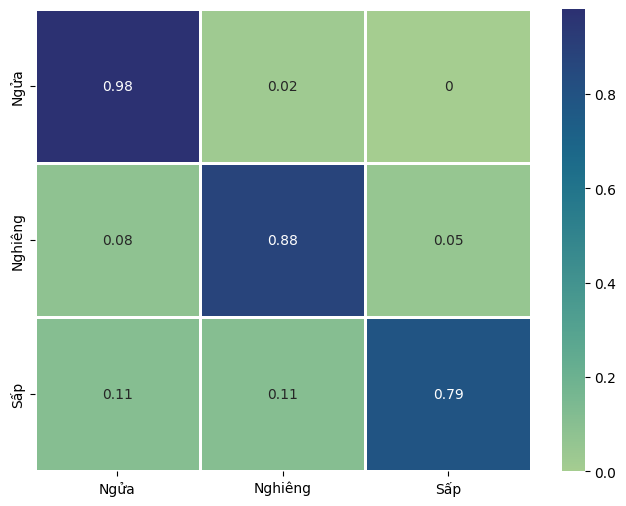

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

label_counts = np.sum(cf, axis=1)
cf = cf / label_counts[:, None]
cm_cross_val = np.round(cf, 2)
confusion_matrix_df = pd.DataFrame(cm_cross_val, index=["Ngửa", "Nghiêng", "Sấp"], columns=["Ngửa", "Nghiêng", "Sấp"])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, linewidths=1, annot=True, ax=ax, fmt="g", cmap="crest")